# Refined Stratified Sampling Example 2

- Author: Mohit S. Chauhan 
- Date: Aug 5, 2018

In this example, Stratified sampling is used to generate samples from Uniform probability distribution and sample are added using adaptive approach Refined Stratified Sampling.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the STS and RSS class from UQpy.

In [1]:
from UQpy.SampleMethods import STS
from UQpy.SampleMethods import RSS
from UQpy.Distributions import Uniform
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from scipy.spatial import Delaunay
from scipy.spatial import Voronoi, voronoi_plot_2d

Create a distribution object.

In [2]:
marginals = [Uniform(loc=0., scale=1.), Uniform(loc=0., scale=1.)]

Run stratified sampling.

In [3]:
x = STS(dist_object=marginals, stype='Voronoi', nsamples=16, random_state=0)

Plot the resulting stratified samples and the boundaries of the strata in the U(0,1) space.

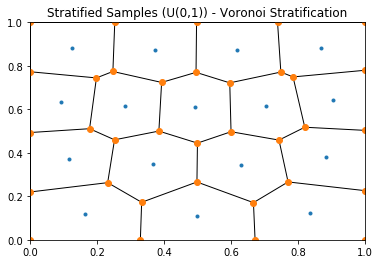

In [4]:
fig = voronoi_plot_2d(x.strata)
plt.title('Stratified Samples (U(0,1)) - Voronoi Stratification')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

Using UQpy RSS class to expand samples generated by STS class. In this example, two new samples are generated inside cells with maximum weight associated with it.

In [5]:
y = RSS(sample_object=x, nsamples=18, n_add=2, random_state=2)

The figure shows the voronoi tesselation of initial samples and samples generated using RSS class. The RSS class creates a Delaunay triangulation using existing samples and generate a new sample inside the triangle with maximum volume.

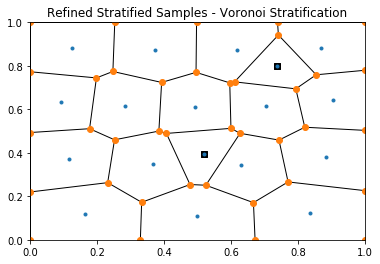

In [6]:
fig2 = voronoi_plot_2d(y.sample_object.strata)
plt.title('Refined Stratified Samples - Voronoi Stratification')
plt.scatter(y.sample_object.samples[16:18, 0], y.sample_object.samples[16:18, 1], marker='s', color='black')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

Further, RSS class is used to adaptively increase the sample size. In this example, samples are randomly added in cell with maximum weights associated with it and new sample generated using Simplex class.

In [7]:
y.run(nsamples=50)

In the figure shown below, all samples generated from STS and RSS class are plotted.

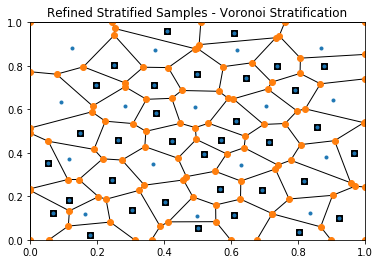

In [8]:
fig2 = voronoi_plot_2d(y.sample_object.strata)
plt.title('Refined Stratified Samples - Voronoi Stratification')
plt.scatter(y.sample_object.samples[16:, 0], y.sample_object.samples[16:, 1], marker='s', color='black')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()